### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Week 1: Predicting business outcomes with regression!

This week, we will take a deep dive into predictive analytics and, more specifically, regression modelling. You will use this notebook to follow along with the demonstrations throughout the week. 

This is your notebook. Use it to follow along with the demonstrations, test ideas and explore what is possible. The hands-on experience of writing your own code will accelarate your learning!

For more tips: https://jupyter-notebook.readthedocs.io/en/latest/ui_components.html

### 1.1 Advanced Analytics with Python

### 1.1.5 A/B testing in Python

**Step 1: Formulate hypotheses**

Kiara sets her hypotheses:

   H0: p=p0

   Ha: p≠p0

Where:

H0: The new home page design does not perform better than the old design

Ha : The new home page design performs better than the old design

p: The conversion rate of the new design

p0: The conversion rate of the old design (i.e. 13%)

**Step 2: Conduct a power analysis**

Determine the sample size by specifying the following parameters
- power (probability of rejecting H0)
- alpha: (1-confidence level)
- effect: meaningful minimum change

In [24]:
# Import the statsmodel for statistical calculations and
# the ‘TTestIndPower’ class to calculate the parameters for the analysis:
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

# Specify the three required parameters for the power analysis:
# Specify alpha = 1 - confidence level
alpha = 0.05 
# Specify power = probability that the given test correctly rejects the H0
power = 0.8 
# Specify effect = 2% increase in conversion rate, from 13% to 15%
effect = sms.proportion_effectsize(0.13, 0.15)

# Perform power analysis by using the solve_power() function:
# Specify an instance of TTestIndPower
analysis = TTestIndPower() 
# Calculate the sample size and list the parameters
# Note "analysis" is our assigned variable
result = analysis.solve_power(effect, power=power, nobs1=None,
                              ratio=1.0, alpha=alpha) 

# Print the output up to 3 decimal places (with lead-in text)
print('Sample Size: %.3f' % result)

Sample Size: 4720.435


This means that Kiara needs **at least 4,721 observations** for each of her sample groups for the results to be meaningful. Note this has solved for the minimum sample size, so we must round up to the nearest integer.

**Step 3: Prepare data in Python**

In [25]:
# Install the relevant modules:
!pip install scipy

# Import necessary libraries, packages and classes
import pandas as pd
# Import Python's built-in maths module
import math
import numpy as np
# Import statsmodels stats test and tools
import statsmodels.stats.api as sms
# Import the scipy.stats for more stats functions
import scipy.stats as st
# Import Matplotlib for visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
# Read the 'ab.data.csv' file
df = pd.read_csv(r'C:\Users\Miffy\Desktop\Course 3\Week 1\Data sets\ab_data.csv')

# View the DataFrame
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [29]:
# Check the metadata for information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Kiara sees that there are **294,478 rows and five columns** of data. Notice that the total number of entries is defined as **294,478**, and all five columns have **294,478 non-null values**, which means there are no null values in the data set.

In [30]:
# check for duplicates
# Use Pandas's duplicated() function to check the user_id column 
print(df[df.user_id.duplicated()])

        user_id                   timestamp      group landing_page  converted
2656     698120  2017-01-15 17:13:42.602796    control     old_page          0
2893     773192  2017-01-14 02:55:59.590927  treatment     new_page          0
7500     899953  2017-01-07 03:06:54.068237    control     new_page          0
8036     790934  2017-01-19 08:32:20.329057  treatment     new_page          0
10218    633793  2017-01-17 00:16:00.746561  treatment     old_page          0
...         ...                         ...        ...          ...        ...
294308   905197  2017-01-03 06:56:47.488231  treatment     new_page          0
294309   787083  2017-01-17 00:15:20.950723    control     old_page          0
294328   641570  2017-01-09 21:59:27.695711    control     old_page          0
294331   689637  2017-01-13 11:34:28.339532    control     new_page          0
294355   744456  2017-01-13 09:32:07.106794  treatment     new_page          0

[3894 rows x 5 columns]


There are **3,894 users with duplicate values**! These need to be dropped from the analysis. To do this, use Pandas **.drop_duplicates()** method

In [33]:
# Use ‘drop_duplicates’ to return the Series without the duplicate values
dropped = df.drop_duplicates(subset = "user_id") 

# print the new DataFrame with duplicates dropped
# (294,478 - 3,894 ) = 290584 rows
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [34]:
# Remove unnecessary columns
# Use ‘dropped.drop’ to remove irrelevant columns from the DataFrame 
# and specify the column names:
# Specify that ‘user_id’ and ‘timestamp’ are columns (i.e. ‘axis 1’) 
final_tab = dropped.drop(["user_id", "timestamp"], axis=1)  

final_tab.head()

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,treatment,new_page,0
3,treatment,new_page,0
4,control,old_page,1


In [35]:
# Check for errors
# Use ‘crosstab’ to compute a simple cross-tabulation between two variables
pd.crosstab(final_tab["group"], final_tab["landing_page"])

landing_page,new_page,old_page
group,,
control,1006,144226
treatment,144314,1038


In [36]:
# Specify groups to be dropped (it should be kept!!)
final_tab_cleaned = final_tab[((final_tab.group == "control") & \
                               (final_tab.landing_page == "old_page")) | \
                              ((final_tab.group == "treatment") & \
                               (final_tab.landing_page == "new_page"))]

# Print the shape of the new ‘final’ table
print(final_tab_cleaned.shape)
final_tab_cleaned["group"].value_counts()

(288540, 3)


treatment    144314
control      144226
Name: group, dtype: int64

In [37]:
# Re-check/compute another simple cross-tabulation
pd.crosstab(final_tab_cleaned["group"], final_tab_cleaned["landing_page"])

landing_page,new_page,old_page
group,,
control,0,144226
treatment,144314,0


**Step 4: Perform random sampling with Pandas**

In [38]:
# Obtain a simple random sample for control and treatment groups with n = 4721; 
# set random_stategenerator seed at an arbitrary value of 22.

# Obtain a simple random sample for the control group.
control_sample = final_tab_cleaned[final_tab_cleaned['group']=='control'].sample\
                    (n=4721, random_state=22) 
# Obtain a simple random sample for the treatment group.
treatment_sample = final_tab_cleaned[final_tab_cleaned['group']=='treatment'].sample\
                    (n=4721, random_state=22)

In [39]:
# Join the two samples.
ab_test = pd.concat([control_sample, treatment_sample], axis=0)

# Reset the A/B index.
ab_test.reset_index(drop=True, inplace=True)

# Print the sample table.
ab_test

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,control,old_page,0
3,control,old_page,0
4,control,old_page,0
...,...,...,...
9437,treatment,new_page,0
9438,treatment,new_page,0
9439,treatment,new_page,0
9440,treatment,new_page,0


**Step 5: Analyse the data**<br>

**5.1 Calculate basic statistics**

In [40]:
# import library
from scipy.stats import sem

# Group the ab_test data set by group and aggregate by converted:
conversion_rates = ab_test.groupby('group')['converted']  

# Calculate conversion rates by calculating the means of columns STD_p and SE_p:
# Standard Error of Mean: standard deviation divided by the square root of the data size
conversion_rates = conversion_rates.agg([np.mean, np.std, sem])

# Assign names to the three columns.
conversion_rates.columns = ['conversion_rate', 'std_deviation','std_error']  

 # Round the output to 3 decimal places
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.124,0.330,0.005
treatment,0.115,0.319,0.005


**5.2 Calculate statistical significance**

In [41]:
# [1] Import proportions_ztest and proportion_confint from statsmodels:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# [2] Create a subset of control and treatment results:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

# [3] Determine the count of the control_results and 
# treatment_result sub-datasets and store them in their respective variables:
n_con = control_results.count()
n_treat = treatment_results.count()

# [4a] Create a variable ‘success’ with the sum of the two data sets
# in a list format: 
successes = [control_results.sum(), treatment_results.sum()]

# [4b] Create a variable ‘nobs’ which stores the values of 
# variables n_con and n_treat in list format: 
nobs = [n_con, n_treat] 

# [5] Use the imported libraries to calculate the statistical values: 
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes,
                                                                        nobs=nobs,
                                                                        alpha=0.05)

# [6a-d] Print the outputs (with lead-in text):
print(f'Z test stat: {z_stat:.2f}')
print(f'P-value: {pval:.3f}')
print(f'Confidence Interval of 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confidence Interval of 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

Z test stat: 1.40
P-value: 0.163
Confidence Interval of 95% for control group: [0.115, 0.134]
Confidence Interval of 95% for treatment group: [0.106, 0.124]


**Step 6: Summarise and communicate the findings**<br>
Conclustion: p value 0.163(16.3%) > alpha value 0.05(5%)

Meaning that Kiara cannot reject her H0. Recall that p-values summarise statistical differences, essentially calculating the probability that the data could deviate from H0. A p-value of 0.163 suggests that the difference between the sample and assumed population means is likely, which in turn suggests that the sample is consistent with the H0. 

This means that the new design did not perform better than the old design(H0). The confidence interval for the treatment group does not reach 13%, never mind the desired 15%, confirming that the new website design was altogether ineffective in increasing the conversion rate.

**Alternative: lambda function**

In [ ]:
# calculate the conversion rates
conversion_rates = ab_test.groupby('Group')['LoyaltyPage']


# Standard deviation of the proportion
# ddof=0, population standard deviation, denominator=n
# ddof=1, sample standard deviation, denominator=(n-1)
STD_p = lambda x: np.std(x, ddof=0)  
# Standard error of the proportion
SE_p = lambda x: st.sem(x, ddof=0)     

conversion_rates = conversion_rates.agg([np.mean, STD_p, SE_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']

conversion_rates.style.format('{:.3f}')

### 1.1.8 Demonstration: Create a testing model with Python

**Step 1: set-up**

In [2]:
# Install Python Sensitivity Analysis  
!pip install sensitivity  

# This might take some time to install.

In [7]:
# Defines classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

**Step 2: specify inputs**

In [8]:
# create DataFrame with various classes using dataclass() module
# object oriented programming

@dataclass
class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 300000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1500000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data 

ModelInputs(starting_salary=300000, promos_every_n_years=5, cost_of_living_raise=0.025, promo_raise=0.15, savings_rate=0.2, interest_rate=0.07, desired_cash=1500000)

Object-oriented programming <br>https://www.learncodewithmike.com/2020/01/python-class.html

**Step 3: calculate wages**

**Equation to account for wage changes over time:**<br>

St = S0(1+rcl)^n(1+rp)^p

Where:<br>
St: wages at year t (salary_t)<br>
S0: starting wages at year 0 (data.starting_salary)<br>
rcl: annual cost of living raise (data.cost_of_living_raise)<br>
p : number of promotions (num_promos)<br>
rp: promotion raise (data.promo_raise)<br>
n : number of years (year)<br>

In [9]:
# define wage equation
# variables: cost of living raises and regular promotions

def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    # int = whole numbers, no decimals
    num_promos = int(year / data.promos_every_n_years)  
    
    # implement the wage calculation
    # ** = exponent /power operator
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    # remember to set what to return or print
    return salary_t

In [10]:
# Show the first four salaries in the range and 
# print the results using the f-string:

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is ${salary:,.0f}.')

The wage at year 1 is $307,500.
The wage at year 2 is $315,188.
The wage at year 3 is $323,067.
The wage at year 4 is $331,144.


In [11]:
# Change to show the salaries for the first 10 years 
# only and print the results using the f-string:

for i in range(10):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is ${salary:,.0f}.')

The wage at year 1 is $307,500.
The wage at year 2 is $315,188.
The wage at year 3 is $323,067.
The wage at year 4 is $331,144.
The wage at year 5 is $390,336.
The wage at year 6 is $400,094.
The wage at year 7 is $410,097.
The wage at year 8 is $420,349.
The wage at year 9 is $430,858.
The wage at year 10 is $507,874.


**Step 4: Calculate wealth**

**Equation to get the amount of cash saved:**<br>
Ct = St x rs

Where:<br>
Ct: cash saved during the year t (cash_saved_during_year)<br>
St: wages at year t (salary_t)<br>
rs: savings rate (data.savings_rate)<br>

In [12]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate:

def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

**Equation of wealth with investment return to the previous year's wealth:**<br>
Wt = Wt-1(1+rj)+Ct

Where:<br>
Wt: wealth at year t<br>
rj: investment rate <br>
Ct: cash saved during the year t <br>

In [13]:
# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year:

def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth

In [14]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.


**Step 5: Calculate retirement**

In [15]:
def years_to_retirement(data:ModelInputs, print_output=True):
        # start with no cash saved
        prior_wealth = 0
        wealth = 0
        # the "year" becomes '1' on the first loop
        year = 0
        
        if print_output:
            print('Wealths over time:')
        while wealth < data.desired_cash:
            year = year + 1
            wealth = wealth_year(data, year, prior_wealth)
            if print_output:
                print(f'The wealth at year {year} is ${wealth:,.0f}.')
                # Set next year's prior wealth to this year's wealth
            prior_wealth = wealth
        
        # now we have run the while loop, the wealth must be >= desired_cash
        # whatever last year was set is the years to retirement, which we can print:
        if print_output:
            # \n makes a blank line in the output
            print(f'\nRetirement:\nIt will take {year} years to retire.')
        return year                

In [16]:
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.
The wealth at year 5 is $380,745.
The wealth at year 6 is $487,417.
The wealth at year 7 is $603,555.
The wealth at year 8 is $729,874.
The wealth at year 9 is $867,136.
The wealth at year 10 is $1,029,411.
The wealth at year 11 is $1,205,583.
The wealth at year 12 is $1,396,691.
The wealth at year 13 is $1,603,844.

Retirement:
It will take 13 years to retire.


### 1.1.10 Running a sensitivity analysis in Python

**1. Defining functions for calculating the values for sensitivity analysis**

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the function that accepts the individual parameters rather than the entire data
def years_to_retirement_separate_args(
    # List the parameters and set their values
    starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02,
    promo_raise= 0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000):  
    # Update the values of the parameters in the ModelInputs class created earlier:
    data = ModelInputs(
        starting_salary=starting_salary, 
        promos_every_n_years=promos_every_n_years, 
        cost_of_living_raise=cost_of_living_raise, 
        promo_raise=promo_raise, 
        savings_rate=savings_rate, 
        interest_rate=interest_rate, 
        desired_cash=desired_cash)
       
    return years_to_retirement(data, print_output=False)

# Call the function.
years_to_retirement_separate_args() 

28

**2. Generate random values for the input variables using list comprehensions**

In [14]:
# Use list comprehensions syntax to make it easier to adjust the inputs
# i is an iterator that is used when writing loops
# i as a temporary variable to store the value’s position in the range
# i can be replaced by count, x, number

sensitivity_values = {
    'starting_salary': [i * 10000 for i in range(4, 8)],
    'promos_every_n_years': [i for i in range(4, 8)],
    'cost_of_living_raise': [i/100 for i in range(1, 4)],
    'promo_raise': [i/100 for i in range(10, 25, 5)],
    'savings_rate': [i/100 for i in range(10, 50, 10)],
    'interest_rate': [i/100 for i in range(3, 8)],
    'desired_cash': [i * 100000 for i in range(10, 26, 5)]}

**3. Running the sensitivity analyser module**

In [15]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs

sa = SensitivityAnalyzer(
    sensitivity_values,
    years_to_retirement_separate_args,
    result_name='Years to Retirement',
    reverse_colors=True,
    grid_size=3)

100%|██████████████████████████████████████████████████████████████████████████| 11520/11520 [00:10<00:00, 1149.12it/s]


In [16]:
# Display the results using a DataFrame.
styled_dict = sa.styled_dfs(num_fmt='{:.1f}') 

,4,5,6,7
starting_salary,,,,
40000,35.1,36.8,38.0,38.9
50000,32.4,33.9,35.0,35.8
60000,30.2,31.6,32.6,33.3
70000,28.4,29.7,30.6,31.3


,0.01,0.02,0.03
starting_salary,,,
40000,39.8,37.1,34.7
50000,36.6,34.2,32.0
60000,34.0,31.9,29.9
70000,32.0,29.9,28.2


,0.1,0.15,0.2
starting_salary,,,
40000,39.1,37.1,35.4
50000,36.0,34.2,32.6
60000,33.5,31.9,30.5
70000,31.4,30.0,28.7


,0.1,0.2,0.3,0.4
starting_salary,,,,
40000,48.1,38.3,33.0,29.3
50000,44.9,35.3,30.1,26.7
60000,42.3,33.0,27.9,24.6
70000,40.2,31.0,26.1,22.9


,0.03,0.04,0.05,0.06,0.07
starting_salary,,,,,
40000,42.3,39.4,36.9,34.7,32.7
50000,38.8,36.2,34.0,32.0,30.3
60000,36.0,33.7,31.7,29.9,28.3
70000,33.8,31.7,29.8,28.2,26.7


,1000000,1500000,2000000,2500000
starting_salary,,,,
40000,30.6,35.8,39.6,42.8
50000,27.9,32.9,36.6,39.6
60000,25.8,30.6,34.2,37.2
70000,24.0,28.7,32.3,35.1


,0.01,0.02,0.03
promos_every_n_years,,,
4,33.6,31.4,29.6
5,35.2,32.9,30.9
6,36.4,34.0,31.8
7,37.2,34.8,32.5


,0.1,0.15,0.2
promos_every_n_years,,,
4,33.6,31.4,29.5
5,34.7,32.9,31.4
6,35.5,34.0,32.6
7,36.1,34.8,33.6


,0.1,0.2,0.3,0.4
promos_every_n_years,,,,
4,41.2,32.5,27.8,24.6
5,43.4,34.0,29.0,25.6
6,44.9,35.1,29.9,26.3
7,46.0,36.0,30.5,26.9


,0.03,0.04,0.05,0.06,0.07
promos_every_n_years,,,,,
4,35.1,33.1,31.4,29.7,28.3
5,37.2,34.8,32.8,30.9,29.3
6,38.7,36.1,33.8,31.8,29.9
7,39.9,37.0,34.6,32.3,30.5


,1000000,1500000,2000000,2500000
promos_every_n_years,,,,
4,25.7,30.3,33.7,36.5
5,26.8,31.7,35.3,38.3
6,27.6,32.6,36.5,39.5
7,28.2,33.4,37.3,40.5


,0.1,0.15,0.2
cost_of_living_raise,,,
0.01,37.4,35.5,33.8
0.02,34.9,33.2,31.7
0.03,32.6,31.1,29.8


,0.1,0.2,0.3,0.4
cost_of_living_raise,,,,
0.01,47.1,36.7,31.1,27.4
0.02,43.8,34.3,29.2,25.8
0.03,40.8,32.2,27.5,24.4


,0.03,0.04,0.05,0.06,0.07
cost_of_living_raise,,,,,
0.01,41.0,37.9,35.3,32.9,30.9
0.02,37.5,35.2,33.1,31.2,29.5
0.03,34.6,32.7,31.1,29.5,28.1


,1000000,1500000,2000000,2500000
cost_of_living_raise,,,,
0.01,28.7,34.1,38.1,41.4
0.02,27.0,31.9,35.6,38.6
0.03,25.4,30.0,33.3,36.0


,0.1,0.2,0.3,0.4
promo_raise,,,,
0.1,46.3,36.1,30.6,27.0
0.15,43.8,34.3,29.2,25.8
0.2,41.5,32.8,28.0,24.8


,0.03,0.04,0.05,0.06,0.07
promo_raise,,,,,
0.1,40.1,37.2,34.7,32.4,30.5
0.15,37.6,35.1,33.1,31.2,29.5
0.2,35.4,33.4,31.7,30.0,28.5


,1000000,1500000,2000000,2500000
promo_raise,,,,
0.1,28.2,33.5,37.5,40.7
0.15,27.0,31.9,35.6,38.6
0.2,25.9,30.5,34.0,36.7


,0.03,0.04,0.05,0.06,0.07
savings_rate,,,,,
0.1,50.2,46.7,43.5,40.7,38.2
0.2,38.9,36.3,34.2,32.2,30.4
0.3,32.8,30.8,29.1,27.5,26.1
0.4,28.8,27.2,25.7,24.4,23.2


,1000000,1500000,2000000,2500000
savings_rate,,,,
0.1,36.8,42.4,46.5,49.8
0.2,28.0,33.0,36.8,39.8
0.3,23.3,28.0,31.5,34.4
0.4,20.2,24.6,28.0,30.7


,1000000,1500000,2000000,2500000
interest_rate,,,,
0.03,30.2,36.1,40.5,44.0
0.04,28.4,33.8,37.8,41.0
0.05,26.9,31.8,35.4,38.4
0.06,25.5,30.0,33.3,36.0
0.07,24.2,28.4,31.4,33.9


**A total of 21 DataFrames.**<br>

Let’s examine how to interpret the output.

- The rows include starting salaries, which reflect the starting salary at US$40,000.
- The columns reflect n years where n represents the number of years between each promotion (i.e. 4, 5, 6, and 7).
- The values in each cell represent the number of years to retirement.
- Colour is used, as per normal heat maps, to represent whether the value is acceptable (green) or poor (red).

### 1.1.10 Running a scenario analysis in Python

What we are doing here is working around the question: How long would it take to retire if:

- the economy is good (e.g. savings_rate rises)
- the economy is normal (i.e. neither good nor bad)
- the economy is bad (e.g. savings_rate falls)

In [18]:
# The function to calculate ‘bad’ economy:
# savings_rate falls from 0.25 to 0.15
bad_economy_data = ModelInputs(
                    starting_salary=100000,
                    promos_every_n_years=8,
                    cost_of_living_raise=0.01,
                    promo_raise=0.07,
                    savings_rate=0.15,
                    interest_rate=0.03)

# The function for ‘good’ economy:
# savings_rate raises from 0.25 to 0.35
good_economy_data = ModelInputs(
                    starting_salary=500000,
                    promos_every_n_years=4,
                    cost_of_living_raise=0.03,
                    promo_raise=0.20,
                    savings_rate=0.35,
                    interest_rate=0.06)

# Original inputs were set to assume a ‘normal’ economy
cases = {'Bad': bad_economy_data,
         'Normal': model_data, 
         'Good': good_economy_data}

In [19]:
# Run the model with the three scenarios
# print the results with a text string
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    print(f'It would take {ytr} years to retire in a {case_type} economy.')

It would take 40 years to retire in a Bad economy.
It would take 13 years to retire in a Normal economy.
It would take 7 years to retire in a Good economy.


Question: why case_type, case_inputs can be connected

In [20]:
# assign probabilities to each scenarios
# values are arbitrary/randomly allocated

case_probabilities = {'Bad': 0.2,
                      'Normal': 0.5,
                      'Good': 0.3}

In [25]:
# Run the model by taking the expected value over the three cases;
# print the results with a text string:

expected_ytr = 0
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    weighted_ytr = ytr * case_probabilities[case_type]
    expected_ytr += weighted_ytr

    
    print(f'It would take {expected_ytr:.0f} years to retire given a \
    {case_probabilities["Bad"]:.0%} \
    chance of a bad economy and {case_probabilities["Good"]:.0%} \
    chance of a good economy.')

It would take 8 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.
It would take 14 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.
It would take 17 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.


In [31]:
# Run the model by taking the expected value over the three cases;
# print the results with a text string:

print(f'Given a {case_probabilities["Bad"]:.0%} chance of a bad economy and\
    {case_probabilities["Good"]:.0%} chance of a good economy,') 

expected_ytr = 0
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    weighted_ytr = ytr * case_probabilities[case_type]
    expected_ytr += weighted_ytr
      
    print(f'it would take {expected_ytr:.0f} years to retire with interest rate .')

Given a 20% chance of a bad economy and    30% chance of a good economy,
it would take 8 years to retire with interest rate .
it would take 14 years to retire with interest rate .
it would take 17 years to retire with interest rate .


# 

### 1.2 Linear regression using Python

In [1]:
# Import NumPy for statistical calculations
# Import Matplotlib for plotting functions
import numpy as np
import matplotlib.pyplot as plt

### Method 1: By statistical calculation

**Step 1. Find the line of best fit**

In [2]:
def estimate_coef(x, y):
    n = np.size(x)  # Specify the size or number of points.
 
    # Calculate the mean of x and y:
    mean_x = np.mean(x)
    mean_y = np.mean(y)
 
    # Calculate the cross-deviation and deviation around x:
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
 
    # Calculate the regression coefficients:
    # m=slope and b=constant
    m = SS_xy / SS_xx
    b = mean_y - m*mean_x
 
    return (b, m)

https://www.geeksforgeeks.org/linear-regression-python-implementation/
https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf

In [3]:
def plot_regression_line(x, y, b):
    # [1] Use scatterplot to plot the actual points:
    plt.scatter(x, y, color = "g",
               marker = "o", s = 30)
 
    # [2] Set the predicted response vector using the linear equation:
    y_pred = b[0] + b[1]*x
 
    # [3] Plot the regression line (in red):
    plt.plot(x, y_pred, color = "r")
 
    # [4] Add two labels for clarity:
    plt.xlabel('x')
    plt.ylabel('y')
 
    # [5] Set a function to display the plot:
    plt.show()

**Step 2. Add data**

Estimated coefficients:
c = 8362.602405110887            
m = 12909.488913942112


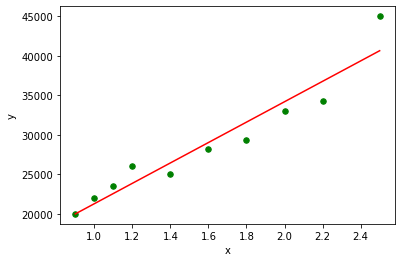

In [6]:
def main():
    # [1] Enter small data set by hand as an array:
    x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
    y = np.array([20000, 22000, 23500, 26000, 25000, 28250,
                  29300, 33000, 34255, 45000])

    # [2] Calculate the coefficients:
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(b[0], b[1]))

    # [3] Plot the regression line (i.e. y = mx + c):
    plot_regression_line(x, y, b)
 
main()

### Method 2: By NumPy function .polyfit( )

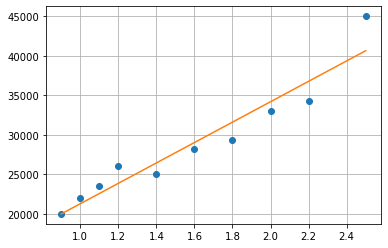

In [16]:
# [1] Re-enter the values of x and y in your Notebook:
x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
y = np.array([20000, 22000, 23500, 26000, 25000, 28250, 29300, 33000, 34255, 45000])

# [2] Create a basic scatterplot.
plt.plot(x, y, 'o')  

# [3] Obtain m (slope) and c (intercept) of the linear regression line:
# parameter 1 is the degree of the fitting polynomial
m, c = np.polyfit(x, y, 1)

# [4] Add the linear regression line to the scatter plot:
plt.plot(x, m*x+c)

plt.grid()

### Method 3: By the statsmodels package

In [17]:
# Import the ‘statsmodels’ package along with NumPy, Pandas, and Matplotlib:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Import and read the data file:
df_test = pd.read_csv('test.csv')

df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [21]:
# Define the dependent variable.
y = df_test['y'] 
# Define the independent variable.
x = df_test['x'] 

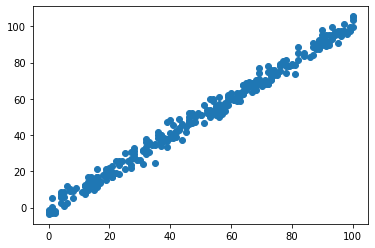

In [22]:
# Check for linearity.
plt.scatter(x, y)  

In [23]:
# Create formula and pass through OLS methods:
# R-style formula, e.g.'Price ~ Size'

f = 'y ~ x'
test = ols(f, data = df_test).fit()

In [24]:
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.33e-294
Time:                        22:53:23   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared** measures the percentage of variation of a dependent variable that is explained by an independent variable. R-squared takes values from 0 to 1. For instance, if the R-squared is 0.25, then around a quarter of the observed variation can be explained by the model's inputs.
<br>
<br>
- **Adjusted R-squared** is R-squared corrected for the number of predictors in the model. Typically it is always positive, and always lower than the R-squared.
<br>
<br>
- **The F-statistic** measures the significance of the model's fit, in other words, it compares your model with zero predictor variables and tells you if the added coefficients improved the model. 
<br>
<br>
- **Prob(F-statistic)** is the **p-value**: the measure of the probability that the observed difference could have happened by chance. The lower the p-value, the greater the statistical signficance.
<br>
<br>
- **Coef** is the predicted coefficient value, or the number that the independent variable would be multiplied by, for example, the m in the linear equation, which we also know as the **slope**.
<br>
<br>
- **The standard error** for the predicted value of the coefficient represents the accuracy of the prediction. The lower the value, the better the prediction.
<br>
<br>
- **The t-statistic value** – a measure of the significance of the coefficient, taken from a t-test, which is the estimated coefficient divided by its standard error.
<br>
<br>
- **P > |t|** : The **p-value** of the respective **two-sided t-test**. The null hypothesis states that the true coefficient = 0. If this value is below the significance level, normally 0.05, then the null hypothesis can be rejected and we can say there is a significant relationship between the independent and dependent variables. 
<br>
<br>
- **Omnibus**, also know as D'Agostino's test, provides a combined statistical test for the presence of **skewness and kurtosis**. 
- The probability of the Omnibus value. 
<br>
<br>
- **Skewness** is a measure of the **symmetry** of the data around the mean. Normal distribution would show a symmetrical distribution on either side of the mean, for example, equal amounts over and above the line. 
<br>
<br>
- **Kurtosis** is a measure of the **shape** of the distribution.
<br>
<br>
- **The Durbin-Watson value** tells you the level of correlation between residuals. You will learn more about it later.
<br>
<br>
- **The Jarque-Berra test** is another test for **skewness and kurtosis**.
- The probability of the Jarque-Berra test. 
<br>
<br>
- **The conditional number** is a test for multicollinearity. You'll learn more about multicollinearity later. 

In [25]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  
# Extract the standard errors.
print("Standard errors: ", test.bse)  
# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -0.461811
x            1.014335
dtype: float64
Standard errors:  Intercept    0.359560
x            0.006162
dtype: float64
Predicted values:  [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  6

https://www.statsmodels.org/stable/index.html

https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [26]:
# Set the the x coefficient to 1.0143
# Set the constant to 0.4618
# Generate the regression table

y_pred = 1.0143 * df_test['x'] - 0.4618

y_pred

0      77.6393
1      20.8385
2      21.8528
3      19.8242
4      36.0530
        ...   
295    71.5535
296    46.1960
297    55.3247
298    62.4248
299    47.2103
Name: x, Length: 300, dtype: float64

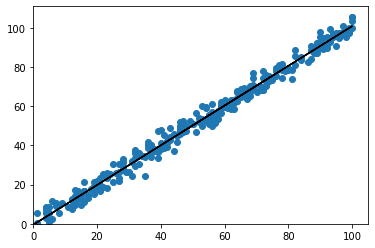

In [30]:
import matplotlib.pyplot as plt

# [1] Plot the data points
plt.scatter(x,y)  

# [2] Plot the regression line (in black).
plt.plot(x,y_pred, color='black')  

# [3] Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 1.2.5 Linear regression with scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [32]:
# Import library for statistical analysis.
import statsmodels.api as sm 
# Import inbuilt data sets in sklearn library.
from sklearn import datasets 
# Import for numerical calculations.
import numpy as np  
# Import sklearn's linear model algorithm.
from sklearn import linear_model 
# Import Pandas library.
import pandas as pd 
# Import for plot generation.
import matplotlib.pyplot as plt 

# Import metrics for measuring linear model fit:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [33]:
# Read the 'salary_data.csv' file.
data = pd.read_csv('salary_data.csv') 

# Print the table.
data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
# More info about the DataFrame.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# 

### 1.3 CAPM and multiple regression